## Exercise 1 Rozdzielczosc czestotliwosciowa

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
from typing import Union, Tuple

def create_signal(signal, sign_freq: Union[int, float], sign_amplitude: Union[int, float], sign_length: int, sampling_freq: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    Creates the signal with specified parameters.
    
    Args:
        signal: The signal that will be created.
        sign_freq Union[int, float]: Frequency of the signal.
        sign_amplitude Union[int, float]: Amplitude of the signal.
        sign_length int: Number of samples.
        sampling_freq int: Sampling frequency.

    Return:
        Tuple[np.ndarray, np.ndarray]: (Time vector, Signal values vector)
    '''
    
    # Signal length
    Ns = sign_length
    # Sampling frequency
    fs = sampling_freq
    # Sampling period
    dt = 1 / fs
    # Time vector
    t = np.arange(0, Ns) * dt

    return t, sign_amplitude * signal(2 * np.pi * sign_freq * t)

### Sinus_1_500 -> 500 Signal Length, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude
### Sinus_2_500 -> 500 Signal Length, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude

In [114]:
Ns = 500  # Signal length
fs = 500  # Sampling frequency

# Sin_1 500 signal length
t_500, sin_1_500 = create_signal(
    signal=np.sin,
    sign_freq=30,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

# Sin_2 500 signal length
t_500, sin_2_500 = create_signal(
    signal=np.sin,
    sign_freq=30.5,
    sign_amplitude=2,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_500 = sin_1_500 + sin_2_500

### Sinus_1_500 -> 2000 Signal Length, 500 Sampling Frequency [Hz], 30 Signal Frequency [Hz], 1 Amplitude
### Sinus_2_500 -> 2000 Signal Length, 500 Sampling Frequency [Hz], 30.5 Signal Frequency [Hz], 2 Amplitude

In [115]:
Ns = 500 * 4  # Signal length
fs = 500  # Sampling frequency

# Sin_1 2000 signal length
t_2000, sin_1_2000 = create_signal(
    signal=np.sin,
    sign_freq=30,
    sign_amplitude=1,
    sign_length=Ns,
    sampling_freq=fs
)

# Sin_2 500 signal length
t_2000, sin_2_2000 = create_signal(
    signal=np.sin,
    sign_freq=30.5,
    sign_amplitude=2,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_2000 = sin_1_2000 + sin_2_2000

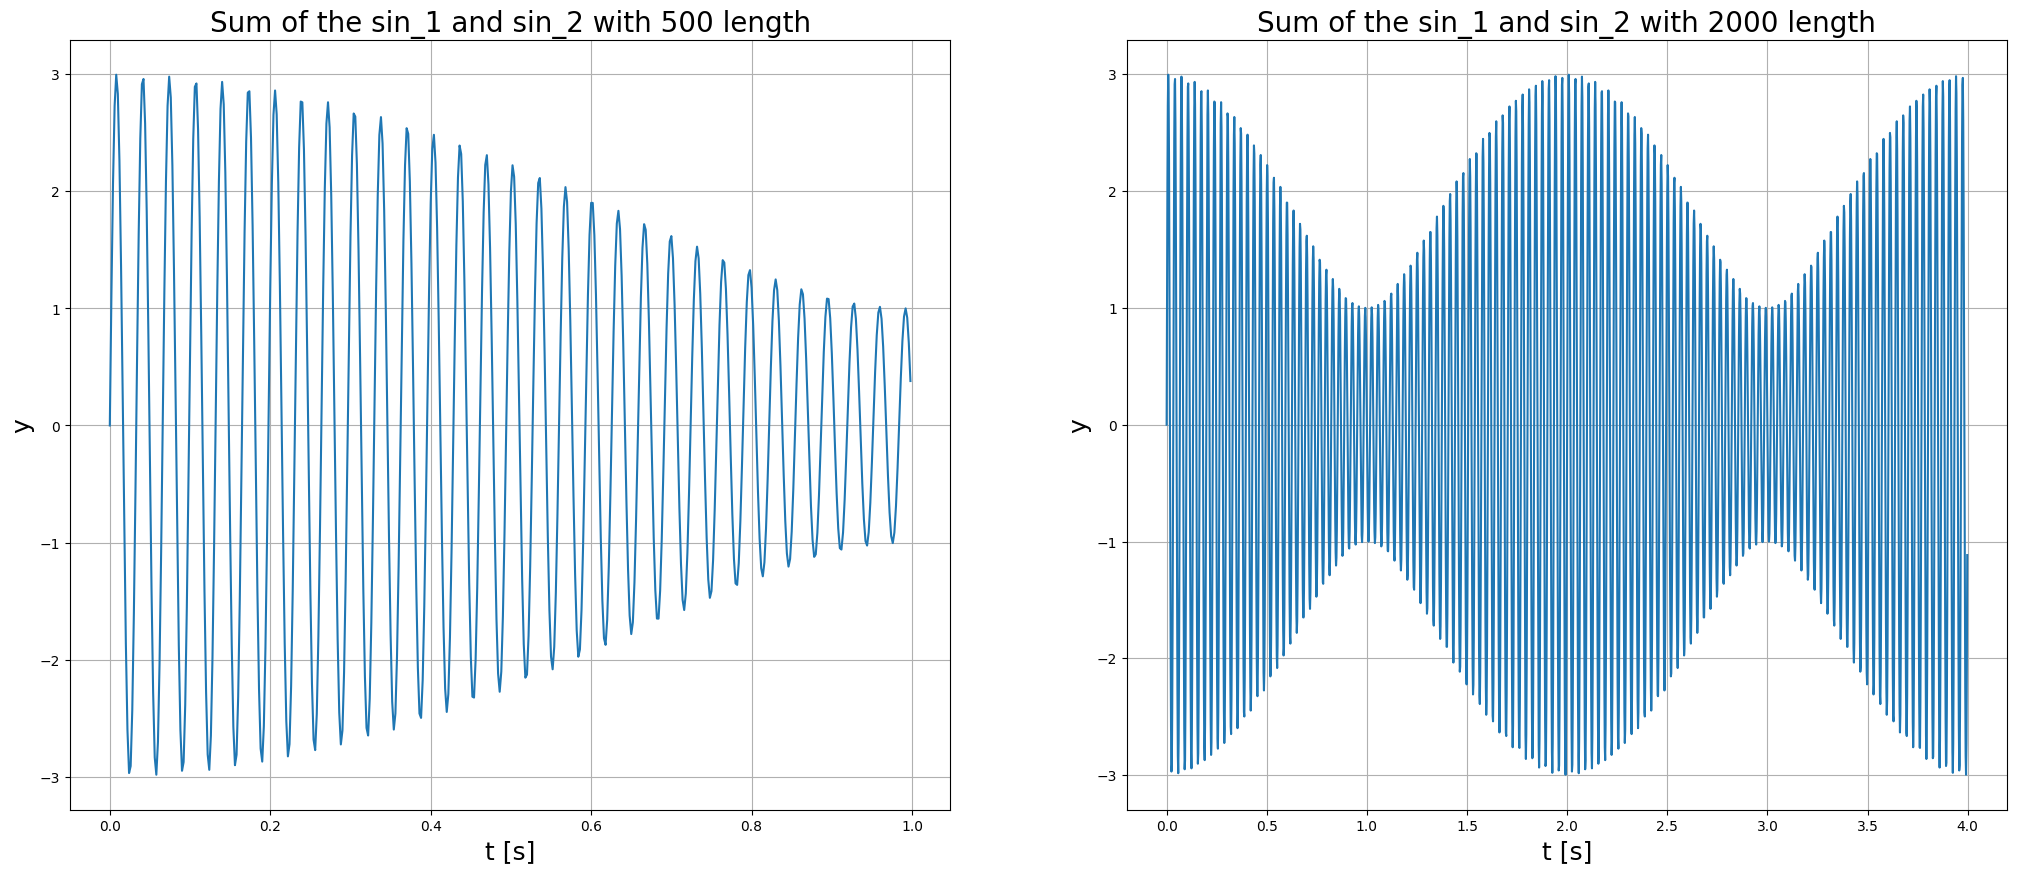

In [116]:
# Creates figure and axes
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))

# y with 500 signal length
ax[0].plot(t_500, y_500)

ax[0].set_title('Sum of the sin_1 and sin_2 with 500 length', fontsize=20)
ax[0].set_xlabel('t [s]', fontsize=18)
ax[0].set_ylabel('y', fontsize=18)
ax[0].grid()

# y with 2000 signal length
ax[1].plot(t_2000, y_2000)

ax[1].set_title('Sum of the sin_1 and sin_2 with 2000 length', fontsize=20)
ax[1].set_xlabel('t [s]', fontsize=18)
ax[1].set_ylabel('y', fontsize=18)
ax[1].grid()

plt.show()

In [117]:
# Fourier transformation for signals with 500 length
N_500 = len(y_500)
Y_500 = (abs(np.fft.fft(y_500)) / N_500) * 2
df_500 = fs / N_500                    # Frequency resolution
fv_500 = np.arange(0, N_500) * df_500  # Frequency vector

In [118]:
# Fourier transformation for signals with 2000 length
N_2000 = len(y_2000)
Y_2000 = (abs(np.fft.fft(y_2000)) / N_2000) * 2
df_2000 = fs / N_2000                     # Frequency resolution
fv_2000 = np.arange(0, N_2000) * df_2000  # Frequency vector

### Porownanie transormaty Fouriera dla sygmalow o dlugosci 500 probek i 2000 probek

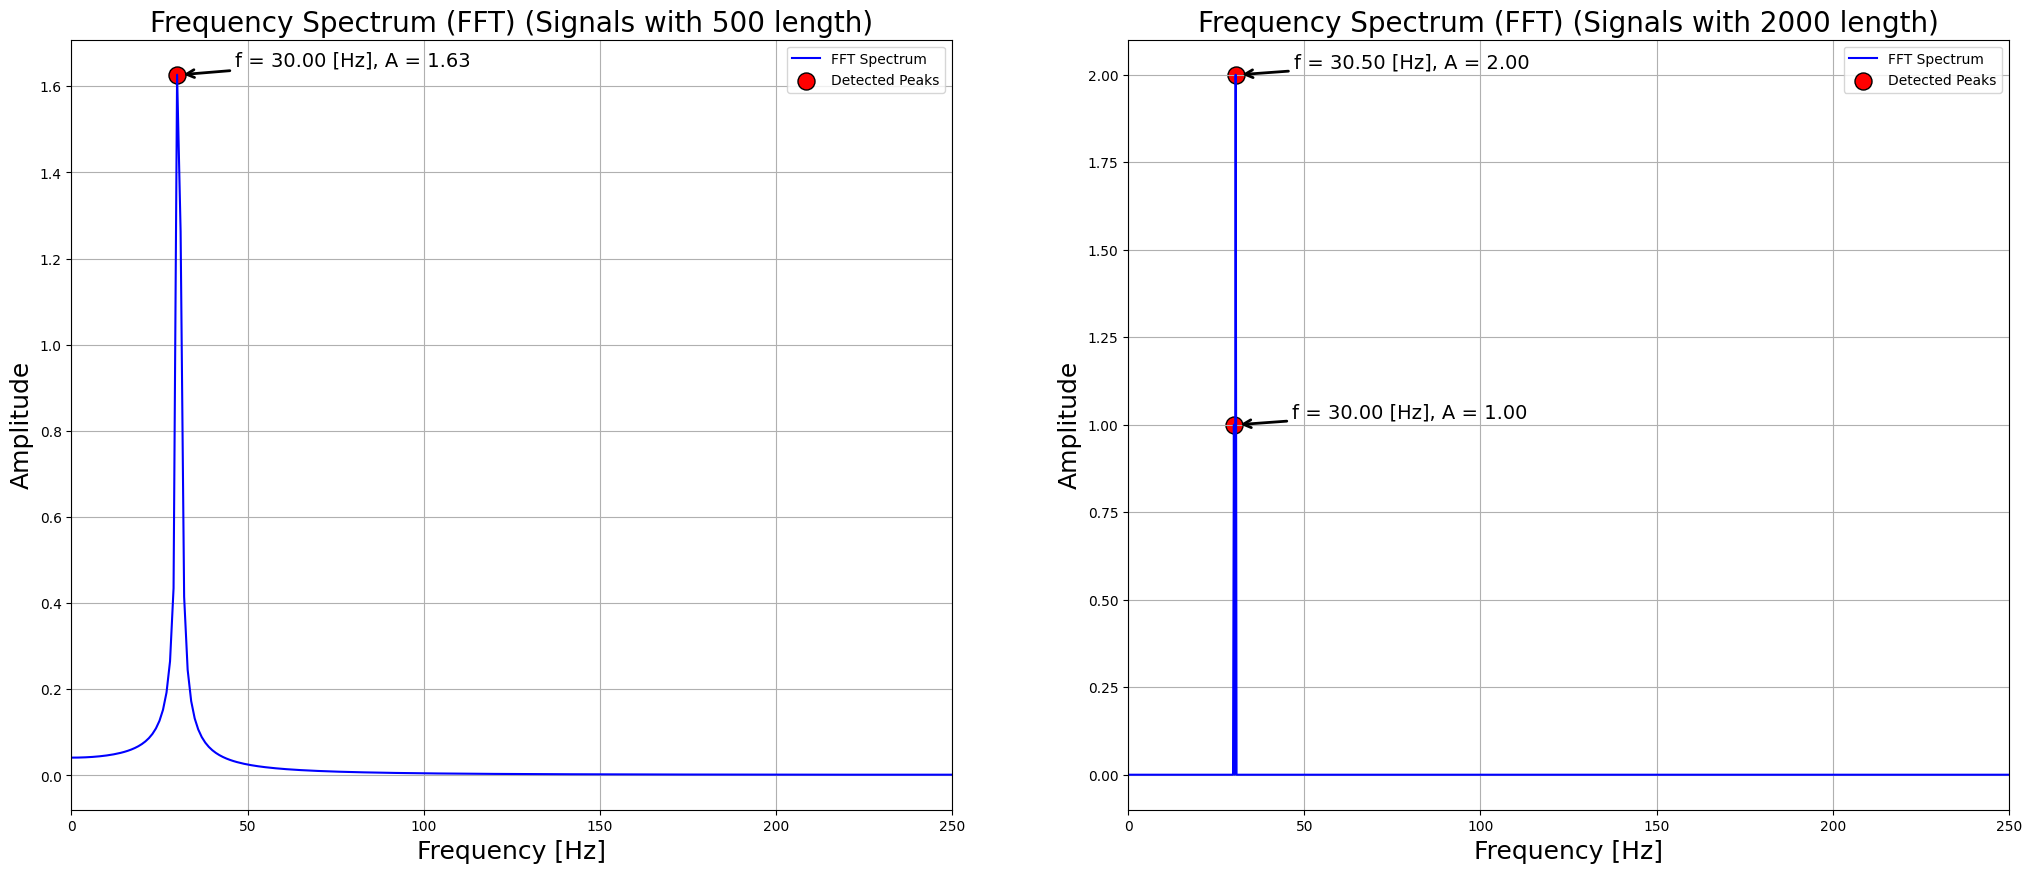

In [119]:
from scipy.signal import find_peaks

fourier_transformations = [Y_500, Y_2000]
frequency_vectors = [fv_500, fv_2000]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))
for idx, (Y, fv) in enumerate(zip(fourier_transformations, frequency_vectors)):
    # Find peaks
    peaks, _ = find_peaks(Y, height=0.05)

    # Plot Spectrum Frequency
    ax[idx].plot(fv, Y, label="FFT Spectrum", color="blue")
    # Add detected peaks
    ax[idx].scatter(fv[peaks], Y[peaks], color='red', s=150, edgecolors='black', label="Detected Peaks")

    # Annotate peaks with arrows
    for peak in peaks[:int(len(peaks) / 2)]:
        f = fv[peak]
        A = Y[peak]
        ax[idx].annotate(f"f = {f:.2f} [Hz], A = {A:.2f}",
                    xy=(fv[peak] + 1, Y[peak]),  # Start point of the arrow
                    xytext=(fv[peak] + 50, Y[peak] + 0.02),  # End point of the arrow
                    arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                    fontsize=14,
                    ha='center')

    # Labels and legend
    ax[idx].set_xlabel('Frequency [Hz]', fontsize=18)
    ax[idx].set_ylabel('Amplitude', fontsize=18)
    ax[idx].set_xlim(0, fs / 2)
    ax[idx].legend()
    ax[idx].grid()

# Titles
ax[0].set_title('Frequency Spectrum (FFT) (Signals with 500 length)', fontsize=20)
ax[1].set_title('Frequency Spectrum (FFT) (Signals with 2000 length)', fontsize=20)    

plt.show()

## Exercise 2 przeciek widma i okienkowanie

### 2.1 Utworz sygnal i wyswietl widmo
### Signal Length = 101

#### Sinus_101 -> 101 Signal Length, 100 Sampling Frequency [Hz], 7 Signal Frequency [Hz], 10 Amplitude
#### Cosinus_101 -> 101 Signal Length, 100 Sampling Frequency [Hz], 20 Signal Frequency [Hz], 0.02 Amplitude

In [120]:
Ns = 101
fs = 100

t_101, sin_101 = create_signal(
    np.sin,
    sign_freq=7,
    sign_amplitude=10,
    sign_length=Ns,
    sampling_freq=fs
)


t_101, cos_101 = create_signal(
    np.cos,
    sign_freq=20,
    sign_amplitude=0.02,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_1_101 = sin_101 + cos_101

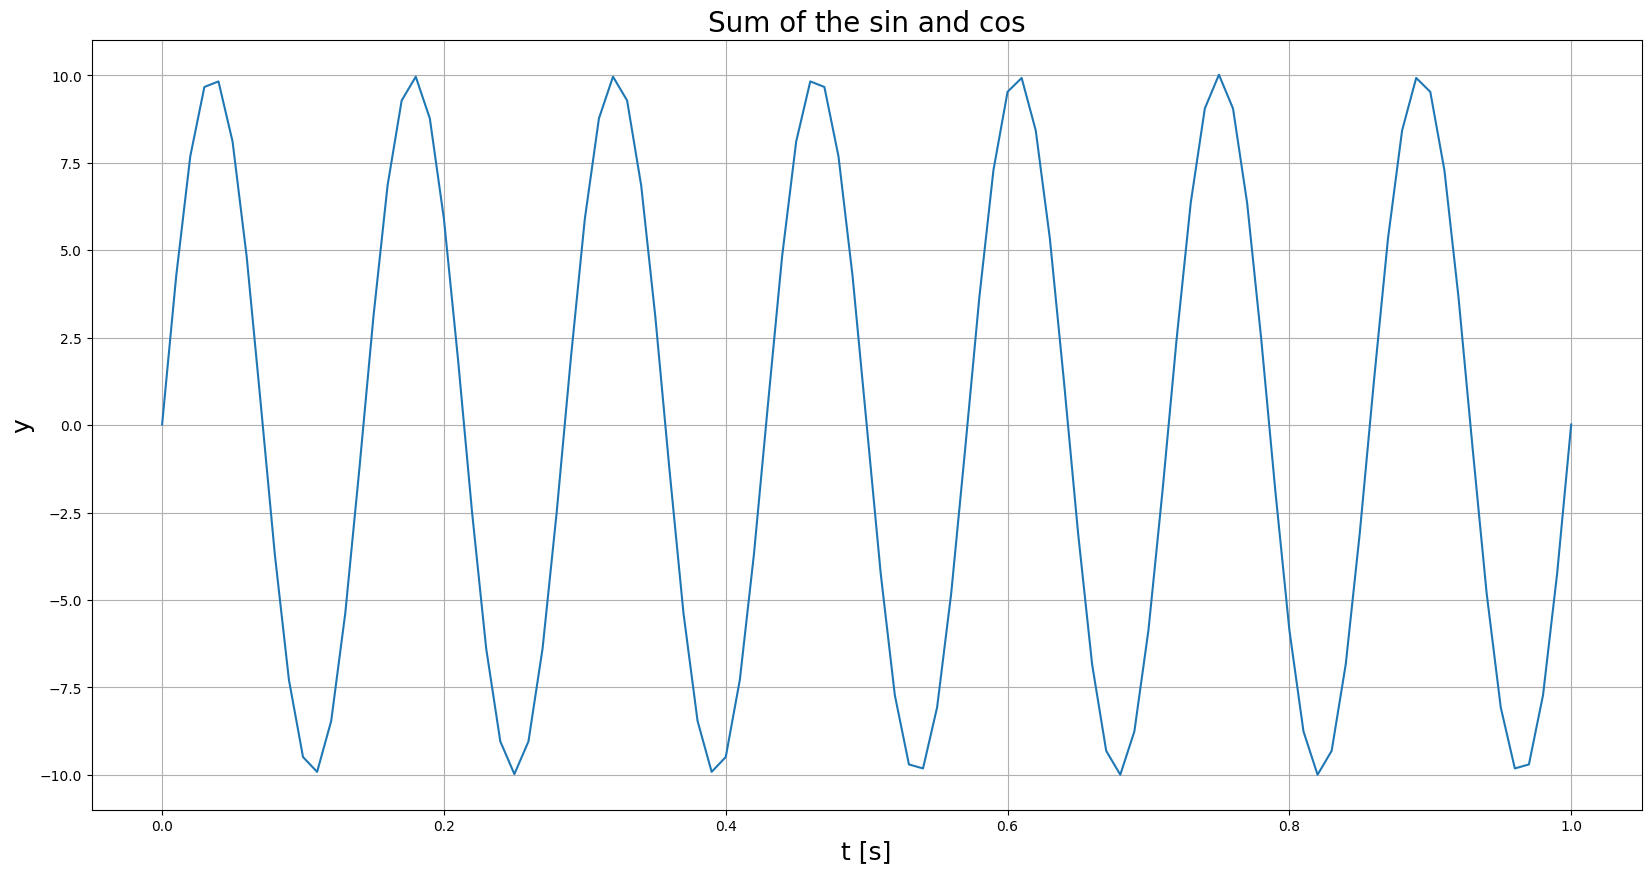

In [90]:
plt.figure(figsize=(20, 10))
plt.plot(t_101, y_1_101)
plt.title('Sum of the sin and cos', fontsize=20)
plt.xlabel('t [s]', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid()
plt.show()

In [91]:
N_101 = len(y_1_101)
Y_101 = np.fft.fft(y_1_101)
df_101 = fs / N_101
fv_101 = np.arange(0, N_101) * df_101

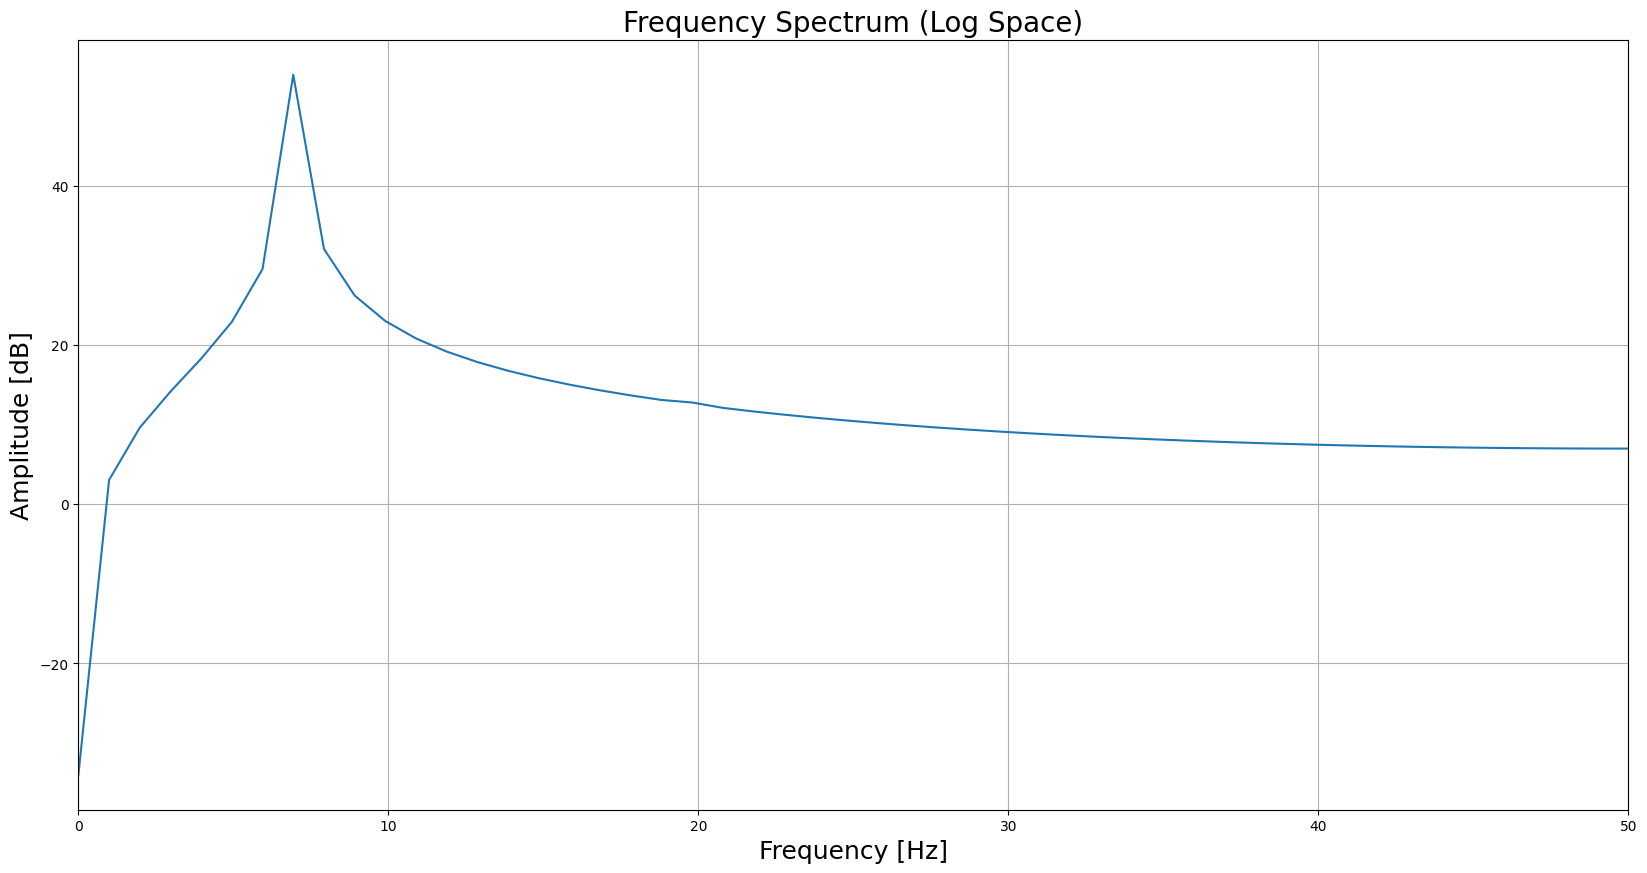

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(fv_101, 20 * np.log10(abs(Y_101)))
plt.title('Frequency Spectrum (Log Space)', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

### 2.2 Zmiana liczby probek
### Signal Length = 100

#### Sinus_100 -> 100 Signal Length, 100 Sampling Frequency [Hz], 7 Signal Frequency [Hz], 10 Amplitude
#### Cosinus_100 -> 100 Signal Length, 100 Sampling Frequency [Hz], 20 Signal Frequency [Hz], 0.02 Amplitude

In [93]:
Ns = 100
fs = 100

t_100, sin_100 = create_signal(
    np.sin,
    sign_freq=7,
    sign_amplitude=10,
    sign_length=Ns,
    sampling_freq=fs
)


t_100, cos_100 = create_signal(
    np.cos,
    sign_freq=20,
    sign_amplitude=0.02,
    sign_length=Ns,
    sampling_freq=fs
)

# Sum of the signal (sin_1 + sin_2)
y_1_100 = sin_100 + cos_100

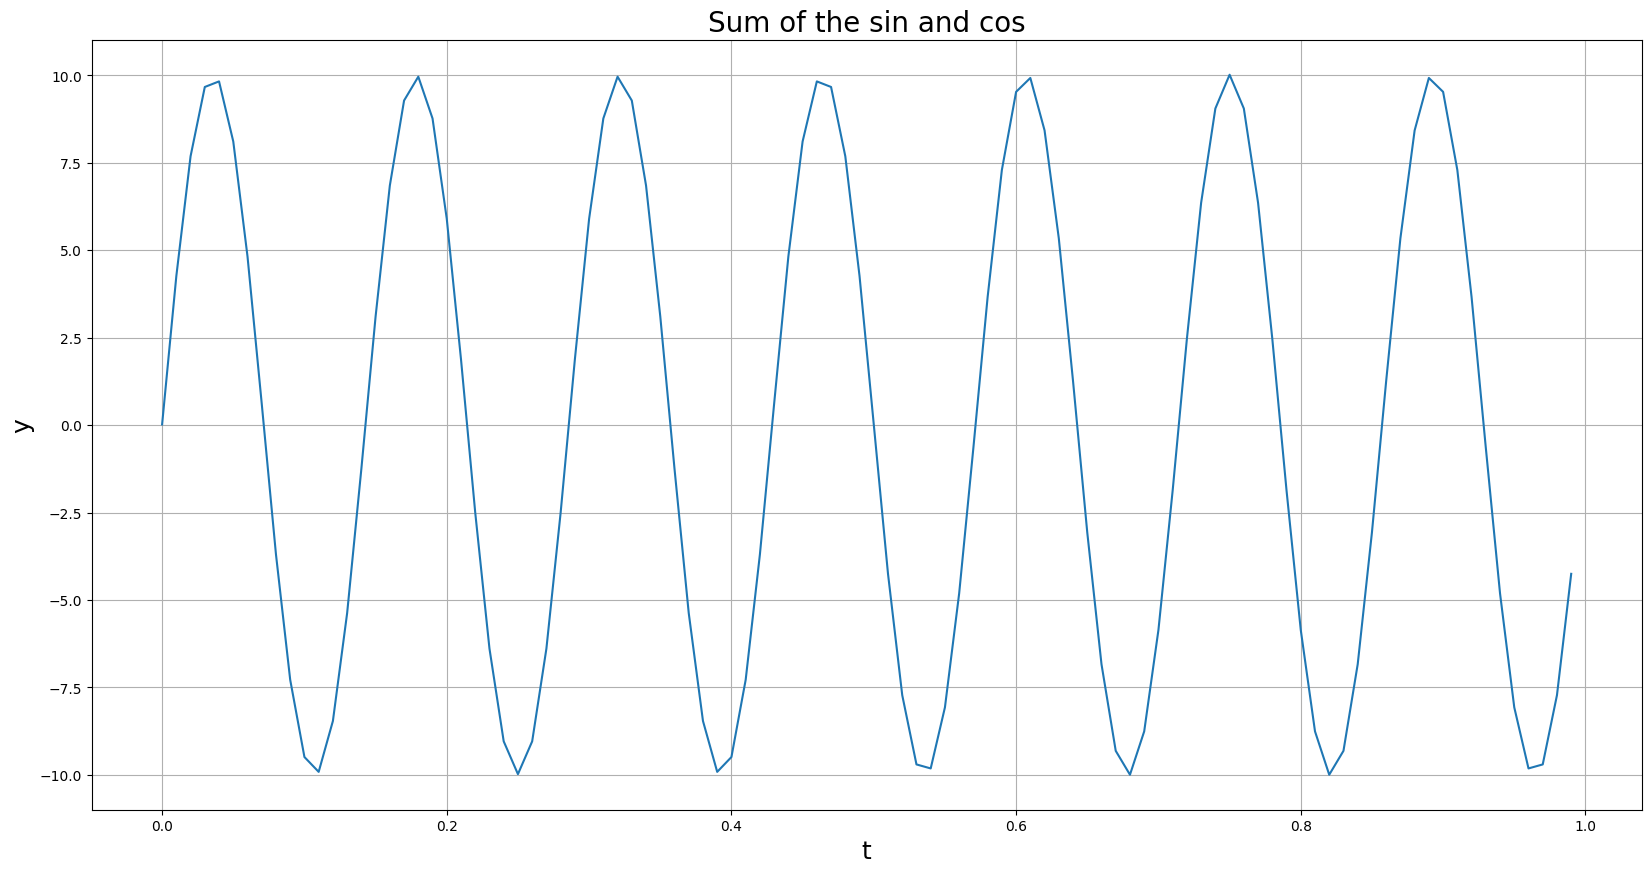

In [94]:
plt.figure(figsize=(20, 10))
plt.plot(t_100, y_1_100)
plt.title('Sum of the sin and cos', fontsize=20)
plt.xlabel('t', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid()
plt.show()

In [95]:
N_100 = len(y_1_100)
Y_100 = np.fft.fft(y_1_100)
df_100 = fs / N_100
fv_100 = np.arange(0, N_100) * df_100

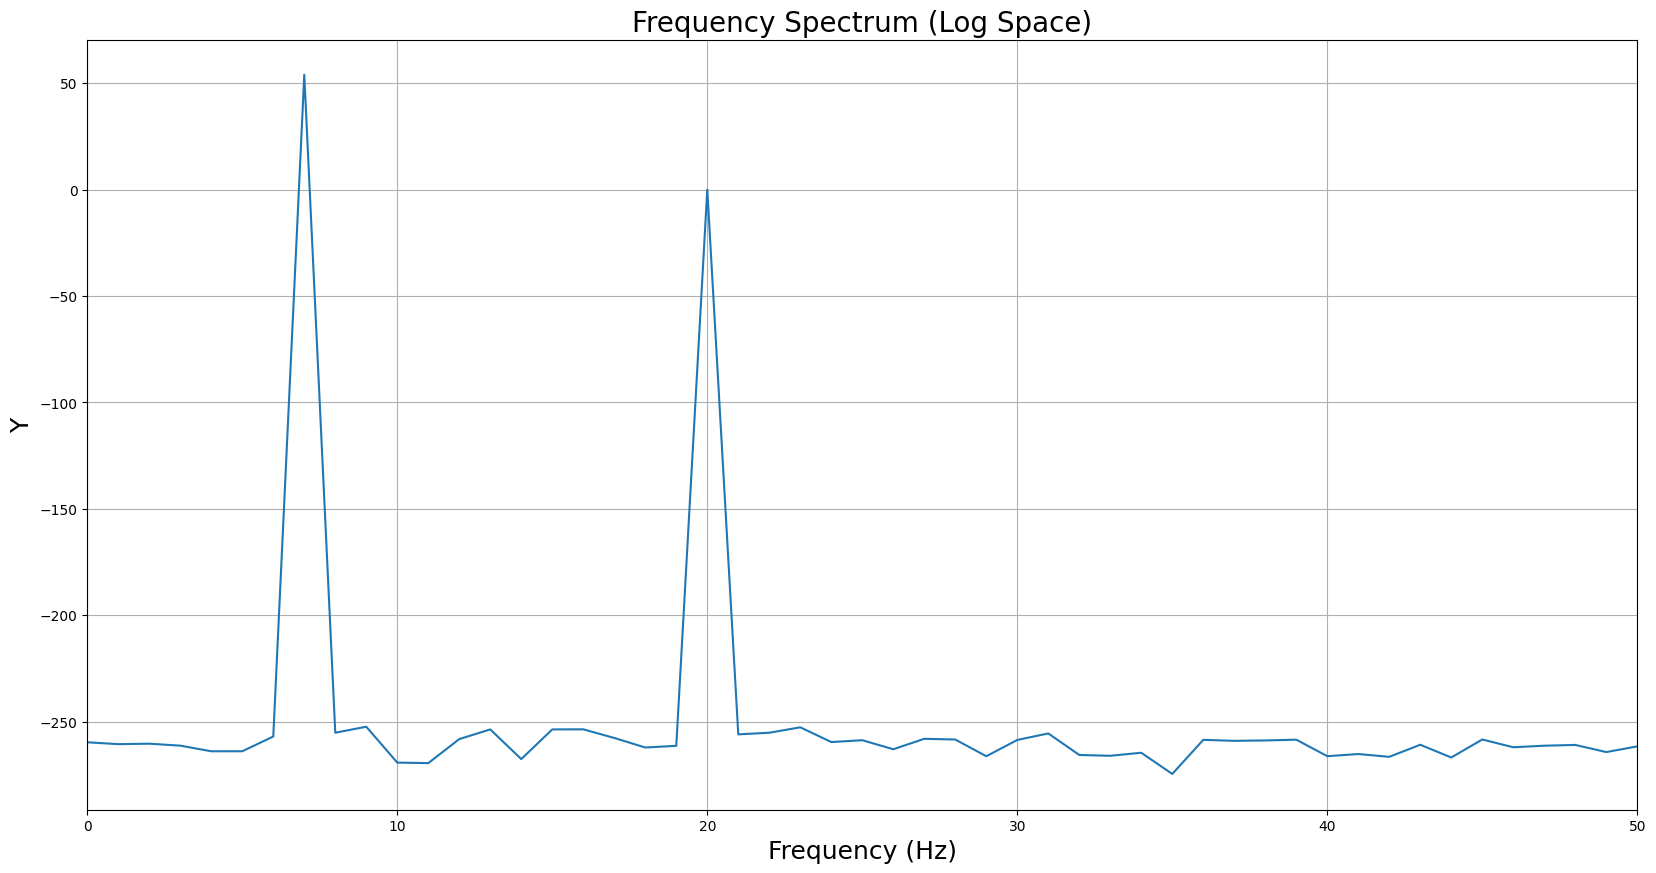

In [96]:
plt.figure(figsize=(20, 10))
plt.plot(fv_100, 20 * np.log10(abs(Y_100)))
plt.title('Frequency Spectrum (Log Space)', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

### Porownanie transormaty Fouriera dla sygmalow o dlugosci 101 probek i 100 probek

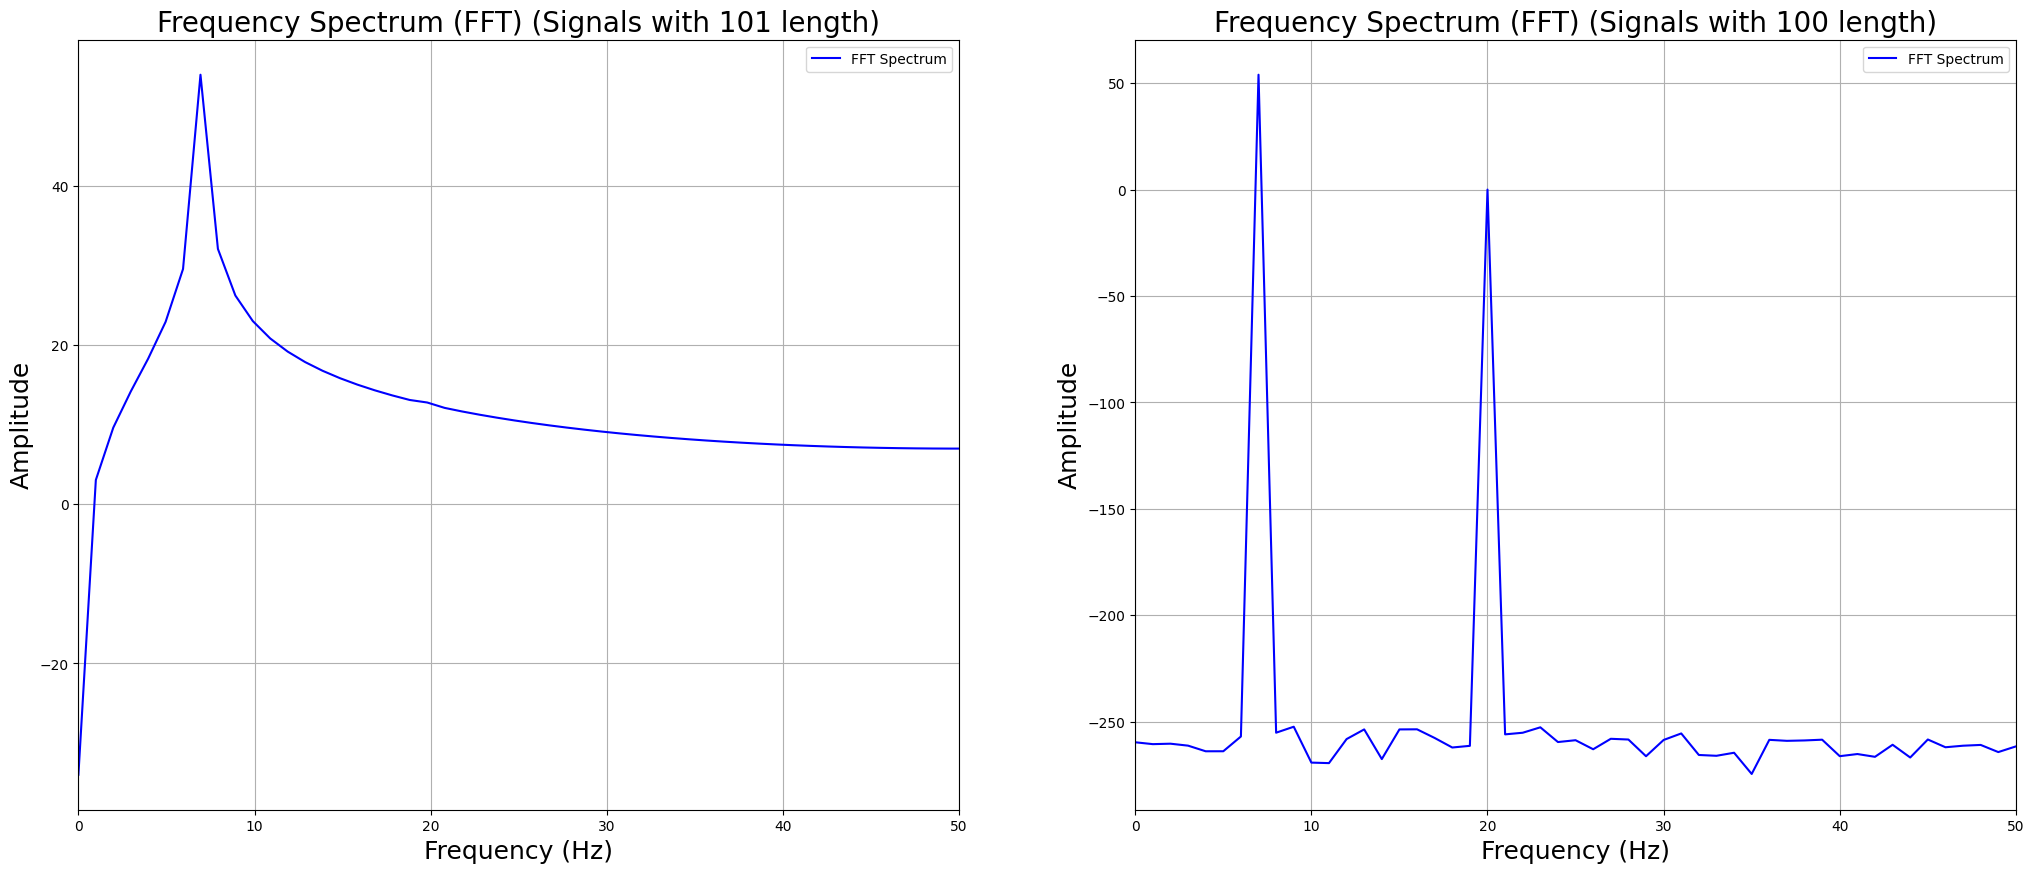

In [106]:
fourier_transformations_dB = [Y_101, Y_100]
frequency_vectors = [fv_101, fv_100]
signal_lengths = [N_101, N_100]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))
for idx, (Y, fv, N) in enumerate(zip(fourier_transformations_dB, frequency_vectors, signal_lengths)):
    Y_dB = 20 * np.log10(abs(Y))

    ax[idx].plot(fv, Y_dB, label="FFT Spectrum", color="blue")

    # Labels and legend
    ax[idx].set_xlabel('Frequency (Hz)', fontsize=18)
    ax[idx].set_ylabel('Amplitude', fontsize=18)
    ax[idx].set_xlim(0, fs / 2)
    ax[idx].legend()
    ax[idx].grid()

# Titles
ax[0].set_title('Frequency Spectrum (FFT) (Signals with 101 length)', fontsize=20)
ax[1].set_title('Frequency Spectrum (FFT) (Signals with 100 length)', fontsize=20)    

plt.show()

W którym przypadku wyraźnie widoczne są przecieki widma? 

### 2.3 Zastosuj okienkowanie

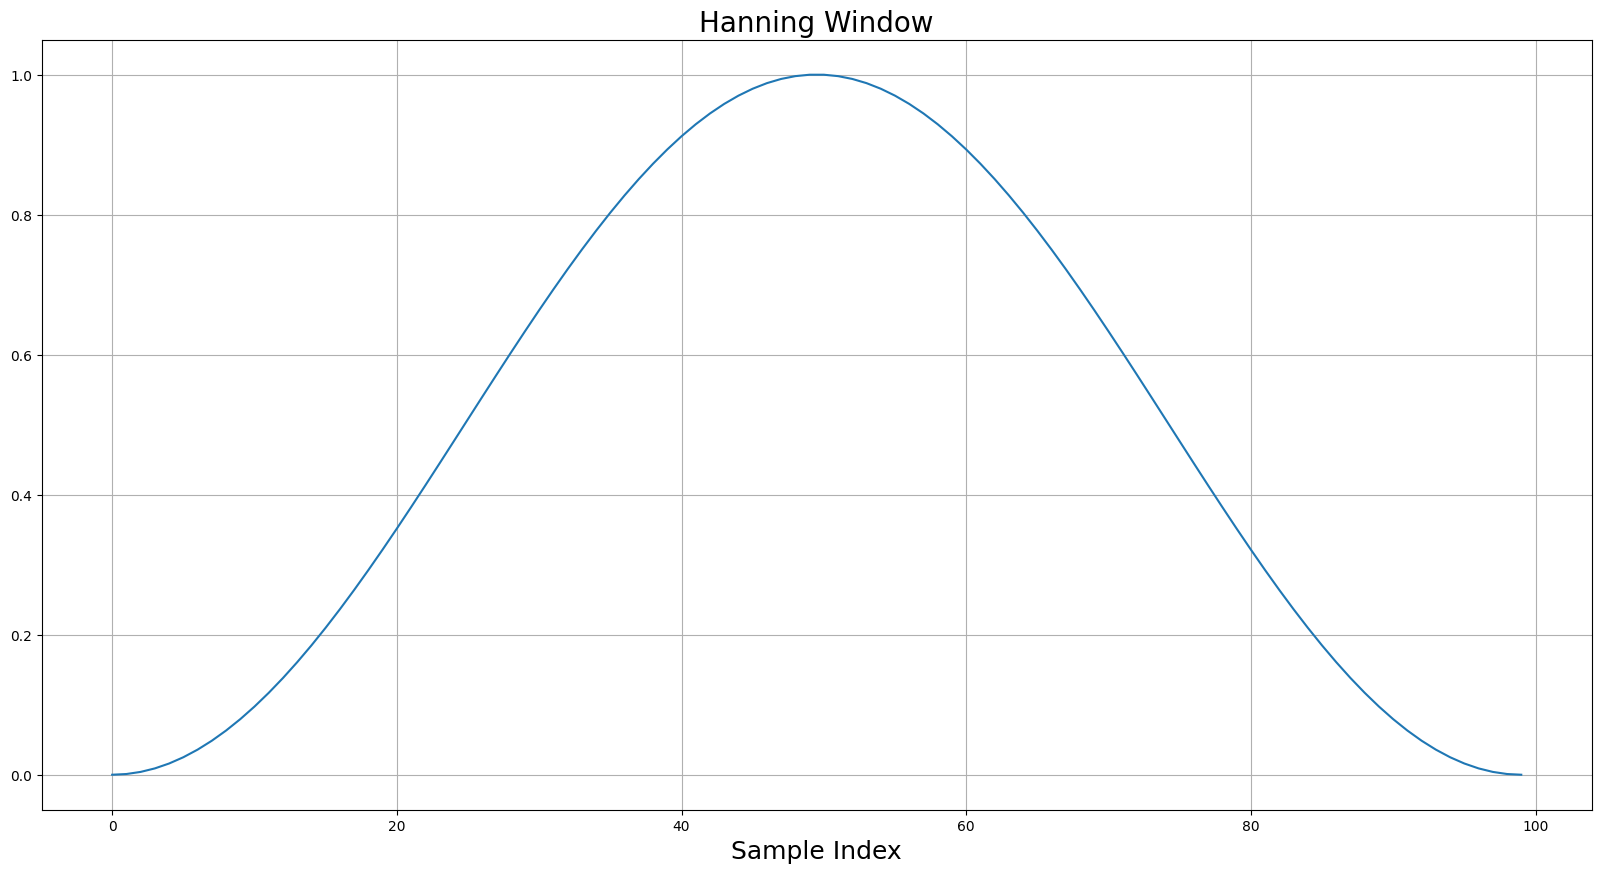

In [98]:
N_hann = len(y_1_100)
hanning_window = np.hanning(N_hann)

plt.figure(figsize=(20, 10))
plt.plot(hanning_window)
plt.title('Hanning Window', fontsize=20)
plt.xlabel('Sample Index', fontsize=18)
plt.grid()
plt.show()

In [99]:
y_2 = y_1_100 * hanning_window

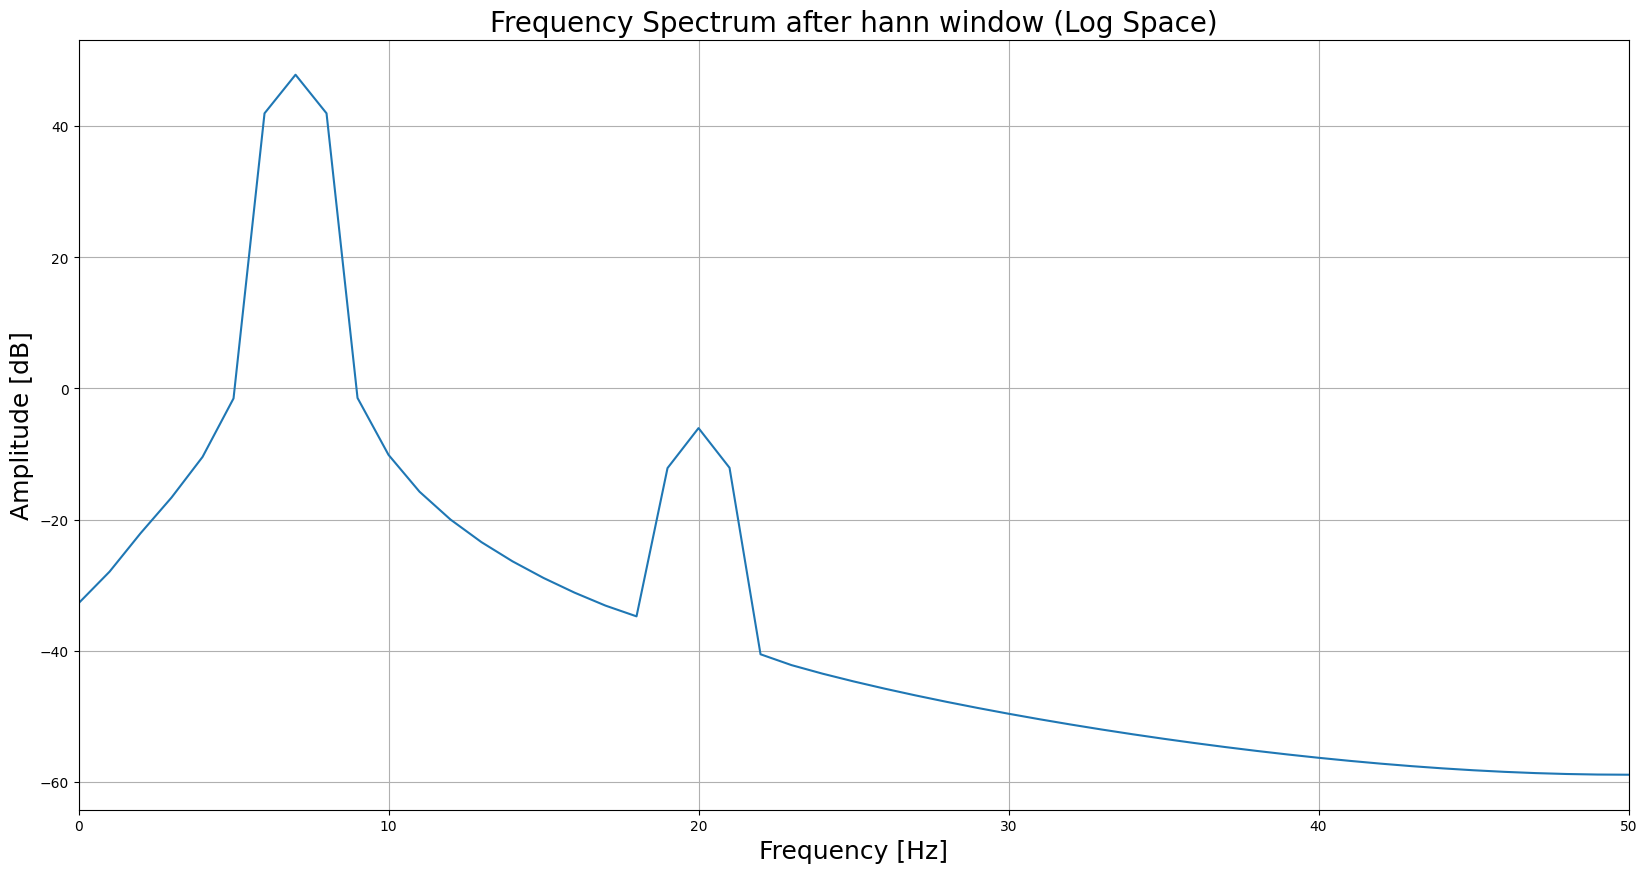

In [ ]:
N_y2 = len(y_2)
Y_y2 = np.fft.fft(y_2)

plt.figure(figsize=(20, 10))
plt.plot(fv_100, 20 * np.log10(abs(Y_y2)))
plt.title('Frequency Spectrum after hann window (Log Space)', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)
plt.grid()
plt.show()

Porownanie wykresow widm dla sygnalu oryginalnego i sygnalo po oknie hanninga

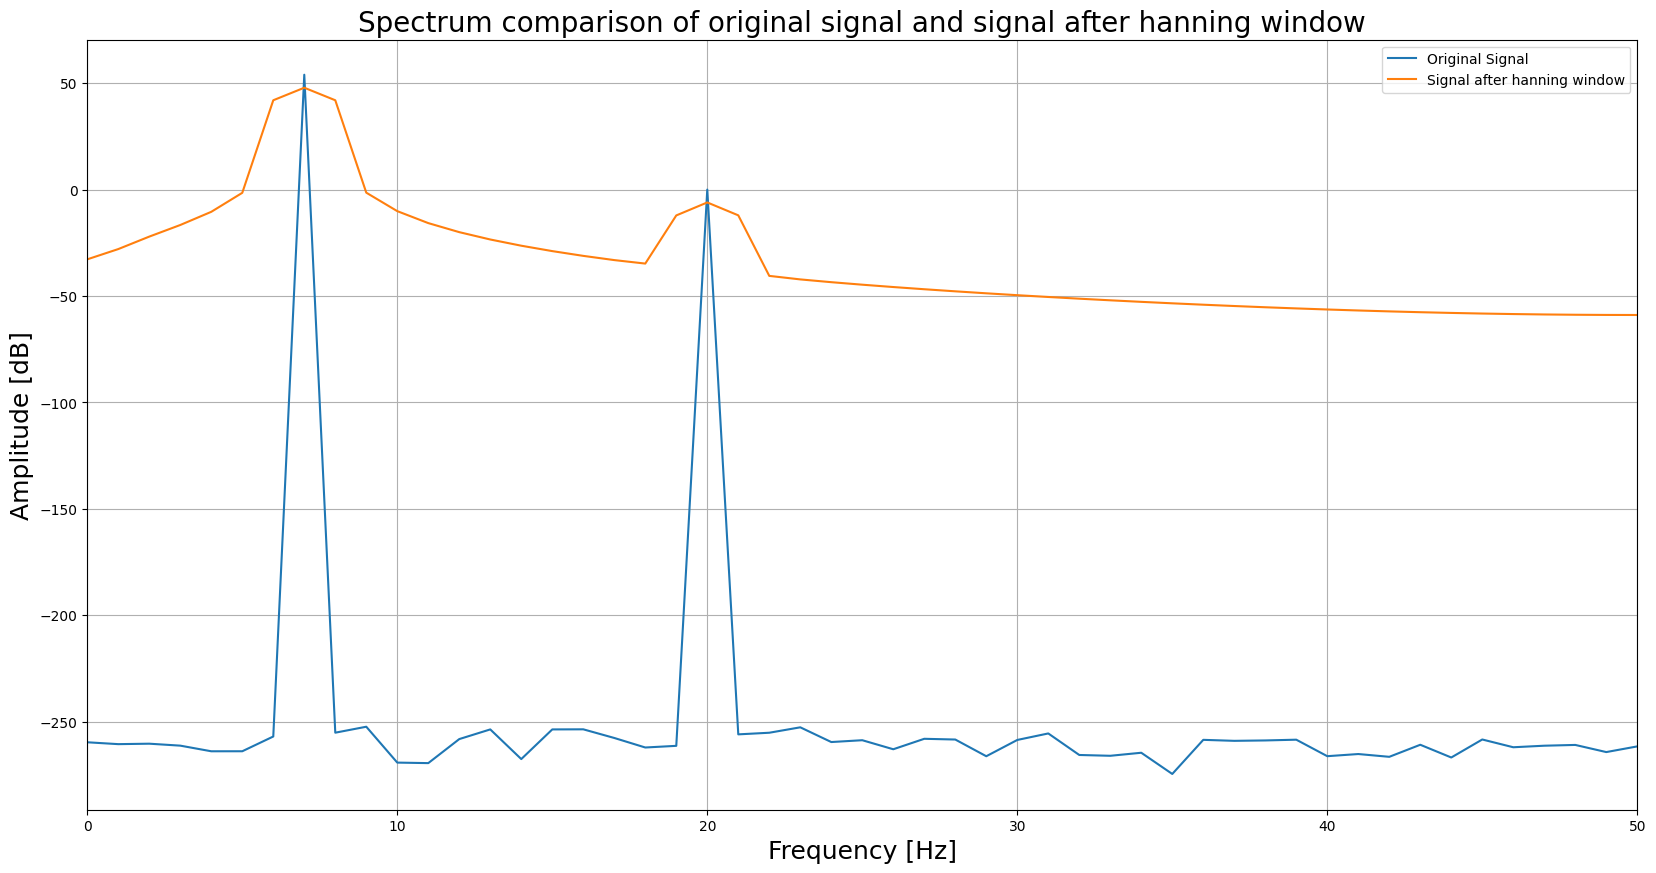

In [101]:
fig = plt.figure(figsize=(20, 10))

plt.plot(fv_100, 20 * np.log10(abs(Y_100)), label='Original Signal')
plt.plot(fv_100, 20 * np.log10(abs(Y_y2)), label='Signal after hanning window')

plt.title('Spectrum comparison of original signal and signal after hanning window', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Amplitude [dB]', fontsize=18)
plt.xlim(0, fs / 2)

plt.grid()
plt.legend()
plt.show()

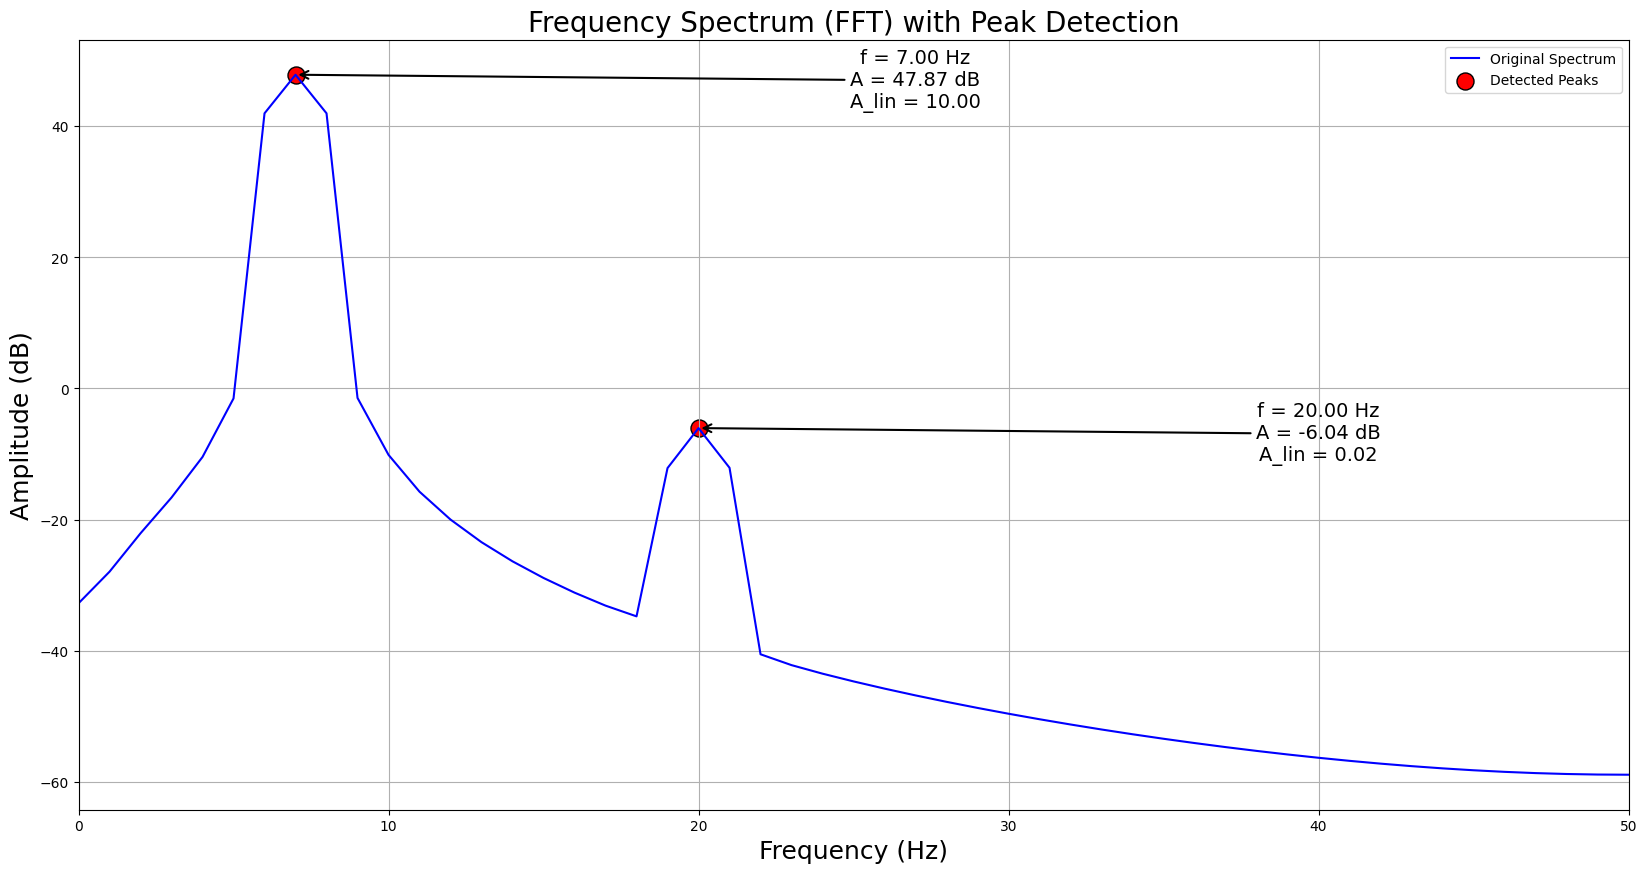

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Compute original FFT magnitude spectrum in dB
Y_dB = 20 * np.log10(np.abs(Y_y2))

# Smooth the spectrum only for peak detection
Y_smooth = gaussian_filter1d(Y_dB, sigma=2)

# Find peaks using the smoothed spectrum
peaks, _ = find_peaks(Y_smooth, height=-300, distance=10, prominence=5, width=3)

# Plot the original spectrum
plt.figure(figsize=(20, 10))
plt.plot(fv_100, Y_dB, label="Original Spectrum", color='blue')

# Highlight detected peaks
plt.scatter(fv[peaks], Y_dB[peaks], color='red', s=150, edgecolors='black', label="Detected Peaks")

hanning_correction = 1 / (np.sum(hanning_window) / N_100)

# Annotate peaks with arrows
N = len(Y)  # Długość sygnału dla poprawnej normalizacji
for peak in peaks:
    amplitude_dB = Y_dB[peak]  # Pobieramy oryginalne wartości w dB
    amplitude_linear = ((2 * np.abs(Y_y2[peak])) / N) * hanning_correction
    
    plt.annotate(f"f = {fv[peak]:.2f} Hz\nA = {amplitude_dB:.2f} dB\nA_lin = {amplitude_linear:.2f}",
                 xy=(fv[peak], amplitude_dB),  # Punkt startowy strzałki
                 xytext=(fv[peak] + 20, amplitude_dB - 5),  # Przesunięcie tekstu
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
                 fontsize=14,
                 ha='center')

# Labels and legend
plt.title('Frequency Spectrum (FFT) with Peak Detection', fontsize=20)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude (dB)', fontsize=18)
plt.xlim(0, fs / 2)
plt.legend()
plt.grid()
plt.show()


### Porownanie wszsytkich 3 wykresow

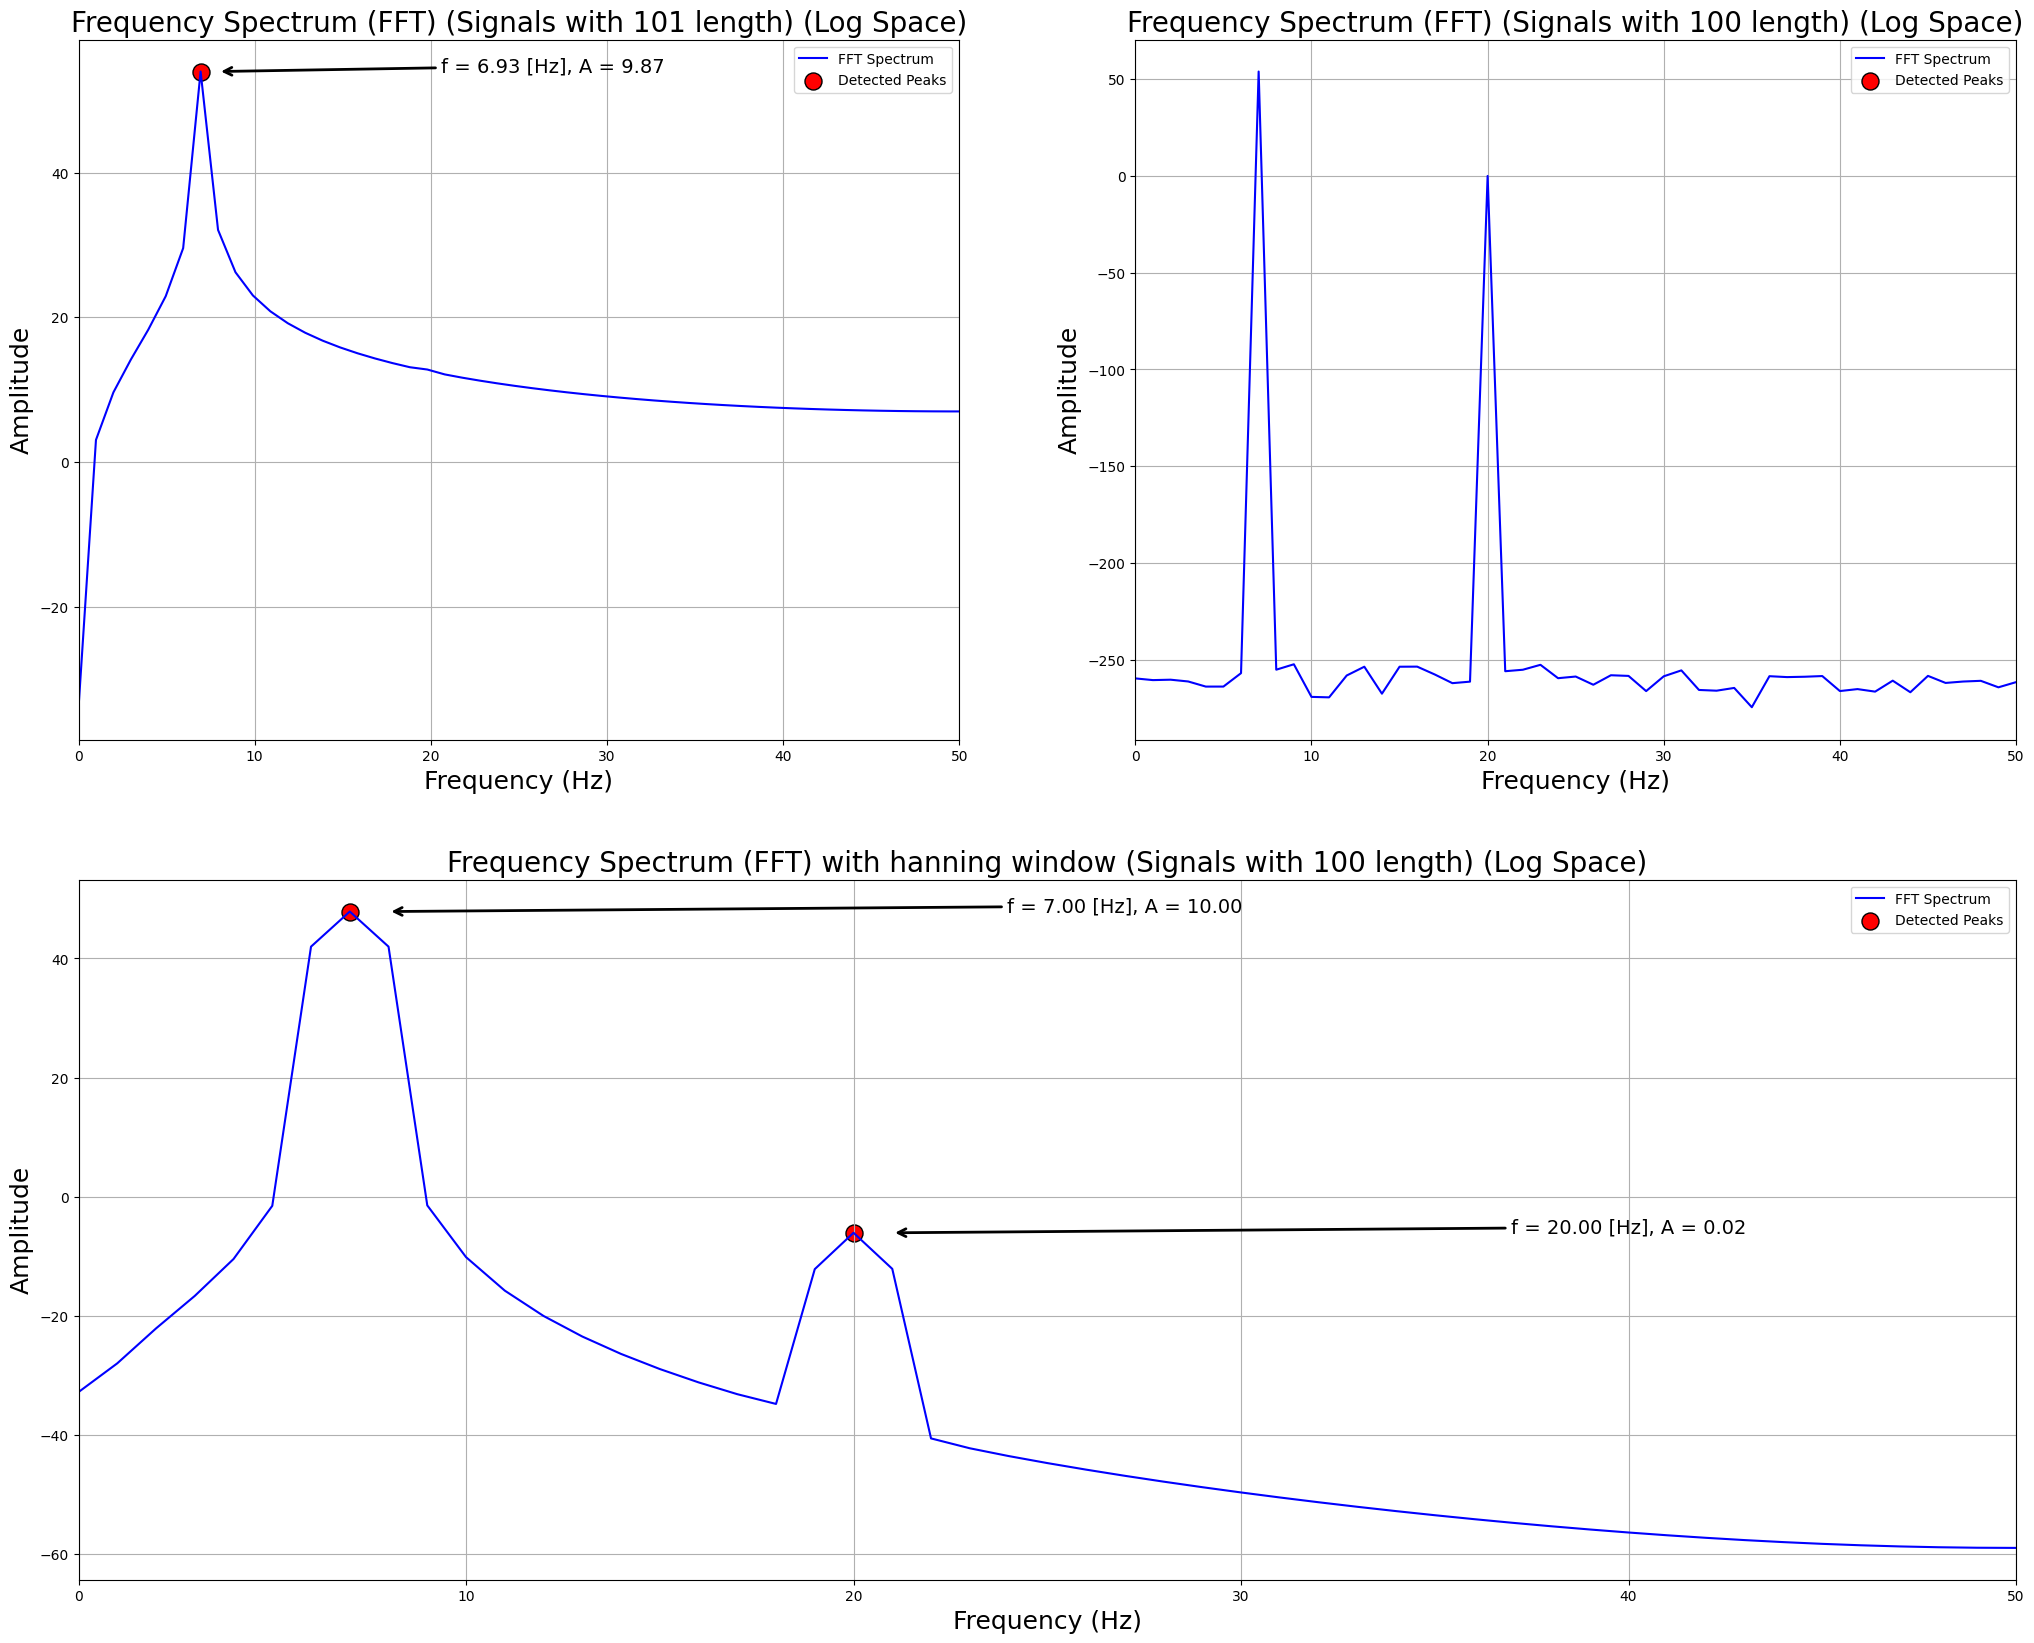

In [108]:
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
from matplotlib.gridspec import GridSpec

fourier_transformations_dB = [Y_101, Y_100, Y_y2]
frequency_vectors = [fv_101, fv_100, fv_100]
signal_lengths = [N_101, N_100, N_100]

fig = plt.figure(figsize=(25, 20))
gs = GridSpec(ncols=2, nrows=2)
ax_1 = fig.add_subplot(gs[0, 0])
ax_2 = fig.add_subplot(gs[0, 1])
ax_3 = fig.add_subplot(gs[1, :])
axes = [ax_1, ax_2, ax_3]

hanning_correction = 1 / (np.sum(hanning_window) / N_100)

for idx, (Y, fv, N) in enumerate(zip(fourier_transformations_dB, frequency_vectors, signal_lengths)):
    Y_dB = 20 * np.log10(abs(Y))
    Y_smooth = gaussian_filter1d(Y_dB, sigma=2)
    peaks, _ = find_peaks(Y_smooth, height=-40, distance=10, prominence=5, width=3)

    axes[idx].plot(fv, Y_dB, label="FFT Spectrum", color="blue")
    # Add detected peaks
    axes[idx].scatter(fv[peaks], Y_dB[peaks], color='red', s=150, edgecolors='black', label="Detected Peaks")

    # Annotate peaks with arrows
    for peak in peaks[:int(len(peaks) / 2)]:
        f = fv[peak]
        A = ((2 * np.abs(Y[peak])) / N)
        if idx == 2:
            A *= hanning_correction

        axes[idx].annotate(f"f = {f:.2f} [Hz], A = {A:.2f}",
                    xy=(fv[peak] + 1, Y_dB[peak]),  # Start paoint of the arrow
                    xytext=(fv[peak] + 20, Y_dB[peak] + 0.02),  # End point of the arrow
                    arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                    fontsize=14,
                    ha='center')

    # Labels and legend
    axes[idx].set_xlabel('Frequency (Hz)', fontsize=18)
    axes[idx].set_ylabel('Amplitude', fontsize=18)
    axes[idx].set_xlim(0, fs / 2)
    axes[idx].legend()
    axes[idx].grid()

# Titles
axes[0].set_title('Frequency Spectrum (FFT) (Signals with 101 length) (Log Space)', fontsize=20)
axes[1].set_title('Frequency Spectrum (FFT) (Signals with 100 length) (Log Space)', fontsize=20)    
axes[2].set_title('Frequency Spectrum (FFT) with hanning window (Signals with 100 length) (Log Space)', fontsize=20)    

plt.show()